In [50]:
# experimental: you can run this cell to see your code full-width

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

## Answering 3 Business Questions using Companies House API

# API we will use: Companies House

Companies house is the official public  register of all companies in the UK. You can search for companiers, peope etc. You can also get basic information about many companies, or request detailed information about one company. You will need to create an account - probably best if you use your university email address. You can find more information on companies house website and https://developer.company-information.service.gov.uk/get-started. 

**All possible API calls you can make:**

There is a number of calls you can make from the API. Find all the details (and info about the format of answers) here: https://developer-specs.company-information.service.gov.uk/companies-house-public-data-api/reference

**Extra notes:  Standard Industrial Classification (SIC)**

company infomation includes 'industry type' as a SIC code. List of codes is here: https://assets.publishing.service.gov.uk/government/uploads/system/uploads/attachment_data/file/527619/SIC07_CH_condensed_list_en.csv/preview

for example:

- 72200 Research and experimental development on social sciences and humanities
- 73110 Advertising agencies
- 73120 Media representation services
- 73200 Market research and public opinion polling
- 74100 specialised design activities
- 74201 Portrait photographic activities
- 74202 Other specialist photography
- 74203 Film processing

# If you do not have one yet: creating a developer account and API  key 

You likely already have an account and key from your previous assignments - it's probably easiest and best if you reuse that account and key.

To create a new one:

- Go to 'register a user account' link https://identity.company-information.service.gov.uk/oauth2/user/signin, enter your **school email** and then click the link you received by email
- setup a password
- login to https://identity.company-information.service.gov.uk/oauth2/user/signin
- go to New Application on top (https://developer.company-information.service.gov.uk/manage-applications/add)
- ented a name and short description for your API project (just say it's a univeristy project) and choose **Live in 'environment for your application'**. Leave other options blank.
- go to 'View all applications' (https://developer.company-information.service.gov.uk/manage-applications)
- click on the name of your application, and then 'Create new key'
- Select these options:
-    Key name and description: here write anything, like 'python project'
-    Select the type of API client key you want to create: REST
- leave other options empty, and click 'Create Key'
- When done, scroll down and copy-paste your key to this notebook. key will look a bit like this: 	e3aaad12-fd44-4aad-9389-f7dccccc67f9

Once you are set up:

- all the possible requests can be found here: https://developer-specs.company-information.service.gov.uk/companies-house-public-data-api/reference
- by the way: you are allowed to ask 600 requests within each five-minute period, after that period, you get another 600. If you use up all the 600 questions, API will make you wait for a few seconds/minutes.

# Some functions to get started: 

In [5]:
# list of library for this project
import requests
import pprint as pp
import datetime
from datetime import date 
import time 
from datetime import datetime
import math
# you might need to add a few of your own

In [6]:
# function for calling the API to retrieve JSON
def call_api_with(url_extension):
    your_company_house_api_key ="ec7b8729-7db6-4912-bb72-6d49b85a7fb2"
        
    login_headers = {"Authorization":your_company_house_api_key}
    url = f"https://api.companieshouse.gov.uk/{url_extension}"
    # above: could be eg. https://api.companieshouse.gov.uk/search/companies?q=shop&items_per_page=1
    #print(f'requesting: {url}') 
    # above, optional: printing, so that you see visually how many calls you are making
    res = requests.get(url, headers=login_headers) #, verify=False)
    if res.status_code == 200:
        return res.json()
    else:
        print("status code is not 'SUCCESS 200'. Will wait 20 seconds")
        time.sleep(20) # sleep X seconds
        return call_api_with(url_extension) # then make the same request that brought you here. Basiclaly try again.
    return res.json()

In [7]:
# test to get one company
def get_one_test_company_or_error():
    url = f"search/companies?q=shop&items_per_page=1"
    return call_api_with(url)

In [8]:
# search company with specific query / keyword
def search_for_companies_with_query(query, number_of_companies = 100):
    # for simplicity round up the number of returned companies to the nearest hundred. eg. 130 becomes 200
    page_size = 100
    number_of_pages = math.ceil(number_of_companies / page_size) # round up
    companies = []
    for page_index in range(0, number_of_pages):
        url = f"search/companies?q={query}&items_per_page={page_size}&start_index={page_index*page_size}"
        companies += call_api_with(url).get('items', [])
    return companies

In [9]:
# request to get company data based on company number
def data_for_company(company_number):
    url = f"company/{company_number}"
    return call_api_with(url)

In [10]:
# get all persons with significant control from company which contains specific keyword
def all_persons_in_company(company_number):
    url = f"company/{company_number}/persons-with-significant-control"
    return call_api_with(url).get('items', [])

In [11]:
def detailed_info_about_companies_with_ids(companies_numbers):
    results = []
    for company_number in companies_numbers:
        results.append(data_for_company(company_number))
    return results

In [12]:
# you are likely to use top level functions like this one.
def detailed_info_about_companies_with_name(name, how_many = 10):
    # eg. unless otherwise stated, just grab 10 companies detailed info
    companies_basic_info = search_for_companies_with_query(name, how_many)
    companies_ids = [company['company_number'] for company in companies_basic_info]
    companies = detailed_info_about_companies_with_ids(companies_ids[:how_many])
    return companies

In [13]:
# example usage. 
# note: To save your quota limits, try to fetch data first, and them analyse it. 
details = detailed_info_about_companies_with_name('banana', how_many=15)

In [14]:
pp.pprint(len(details))
pp.pprint([detail['company_name'] for detail in details])
pp.pprint(details[1])

15
['BANANA LTD',
 'BANANA LTD',
 'BANANA LIMITED',
 'ACORN COMMERCIAL FINANCE LTD',
 'BANANA AFRICAN RESTAURANT AND BAR LIMITED',
 'BANANA AND CUSTARD LIMITED',
 'BANANA & EGG LTD',
 'BANANA & FISH ESTATES LIMITED',
 'BANANA AND PINEAPPLE LTD',
 'BANANA AND SALT LTD',
 'BANANA ANGEL LTD',
 'BANANA APPS LIMITED',
 'BANANA AVIATION LTD',
 'BANANA BANANA LIMITED',
 'BANANA BANDS LTD']
{'accounts': {'accounting_reference_date': {'day': '31', 'month': '08'},
              'last_accounts': {'type': 'null'},
              'next_accounts': {'due_on': '2023-05-11',
                                'overdue': False,
                                'period_end_on': '2022-08-31',
                                'period_start_on': '2021-08-11'},
              'next_due': '2023-05-11',
              'next_made_up_to': '2022-08-31',
              'overdue': False},
 'can_file': True,
 'company_name': 'BANANA LTD',
 'company_number': '13559261',
 'company_status': 'active',
 'confirmation_statement': 

In [15]:
persons = all_persons_in_company(details[0]['company_number'])
pp.pprint(persons)

[{'address': {'address_line_1': 'Marlborough Hill',
              'country': 'England',
              'locality': 'Harrow',
              'postal_code': 'HA1 1UD',
              'premises': 'Healthaid House'},
  'country_of_residence': 'United Kingdom',
  'date_of_birth': {'month': 12, 'year': 1950},
  'etag': '4ab90109c0bbd815c6064b0f7d8f40d402f15e79',
  'kind': 'individual-person-with-significant-control',
  'links': {'self': '/company/10692496/persons-with-significant-control/individual/LE834qoA1WrCJ87u_FBHkWvKeog'},
  'name': 'Mr Clive Ralph Gordon Strawford',
  'name_elements': {'forename': 'Clive',
                    'middle_name': 'Ralph Gordon',
                    'surname': 'Strawford',
                    'title': 'Mr'},
  'nationality': 'British',
  'natures_of_control': ['ownership-of-shares-75-to-100-percent',
                         'voting-rights-75-to-100-percent',
                         'right-to-appoint-and-remove-directors'],
  'notified_on': '2017-03-27'}]


### Business Question 1: What is the best place in the UK to open a cafe?

Which city can be best for a new initiater of a cafe business?

In [16]:
!pip install seaborn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [17]:
# Getting companies with 'Cafe', 'Café', and 'Coffee' in name to gather a sample of cafes in UK
all_cafes = search_for_companies_with_query("Cafe", number_of_companies = 200) + search_for_companies_with_query("Café", number_of_companies = 200) + search_for_companies_with_query("Coffee", number_of_companies = 200)
print(len(all_cafes))
#pp.pprint(all_cafes[2])

600


In [18]:
# Defining functions to get active and dessolved cafes to check their locations in following steps
def get_active_companies(cafes):
    active_cafes = []
    for cafe in cafes:
        if cafe['company_status'] == str('active'):
            active_cafes.append(cafe)
    return active_cafes

def get_dissolved_companies(cafes):
    dissolved_cafes = []
    for cafe in cafes:
        if cafe['company_status'] == str('dissolved'):
            dissolved_cafes.append(cafe)
    return dissolved_cafes

In [19]:
active_cafes = get_active_companies(all_cafes) 
dissolved_cafes = get_dissolved_companies(all_cafes)

In [20]:
# Defining functions to get addresses and then city/town information recorded as 'locality' in the dataset
def get_address(cafes):
    addresses = []
    for cafe in cafes:
        addresses.append(cafe['address'])
    return addresses

def get_locality_of_addresses(addresses):
    return [ get_locality(addresses)
            for address in addresses
            if address != []]

def get_locality(found_addresses):
    return [ address['locality']
            for address in found_addresses
            if 'locality' in address.keys()]

In [21]:
active_addresses = get_address(active_cafes)
dissolved_addresses = get_address(dissolved_cafes)

In [22]:
active_localities = get_locality(active_addresses)
dissolved_localities = get_locality(dissolved_addresses)

In [23]:
# Checking unique locality values and their counts indicating number of cafes located in there
def get_unique_localities(localities): 
    unique_localities = []
    for city in localities:
        if city not in unique_localities:
            unique_localities.append(city)
    return unique_localities  

In [24]:
counts_active = dict.fromkeys(get_unique_localities(active_localities), 0)
for city in active_localities:
    counts_active[city] += 1

counts_dissolved = dict.fromkeys(get_unique_localities(dissolved_localities), 0)
for city in dissolved_localities:
    counts_dissolved[city] += 1
    
active_cafes_df = pd.DataFrame.from_dict(counts_active, orient='index', columns=['Number of Active Cafes'])                                                                         
dissolved_cafes_df = pd.DataFrame.from_dict(counts_dissolved, orient='index', columns=['Number of Dissolved Cafes'])  

In [25]:
active_cafes_df.sort_values('Number of Active Cafes', axis =0 , ascending = False)

,Number of Active Cafes
London,96
Glasgow,12
Birmingham,8
Leicester,7
Manchester,7
...,...
Horsforth,1
Garve,1
Leeds West Yorkshire,1
Dartford,1


In [26]:
# Eliminating small cities with less than 5 cafes considering less customer potential
active_cafes_df.reset_index(level=0, inplace=True)
active_cafes_df.rename(columns={"index":"City"}, inplace=True)

active_cafes_df = active_cafes_df.loc[active_cafes_df['Number of Active Cafes'] > 4]

In [27]:
# Also eliminating London due to too high competition and looking for new opportunities elsewhere
active_cafes_df = active_cafes_df.loc[active_cafes_df['City'] != 'London']
active_cafes_df = active_cafes_df.reset_index(drop=True)

active_cafes_df

,City,Number of Active Cafes
0,Glasgow,12
1,Ashford,5
2,Bristol,5
3,Manchester,7
4,Liverpool,6
5,Belfast,6
6,Leicester,7
7,Birmingham,8
8,Sheffield,5
9,Haywards Heath,5


In [28]:
# Now checking dissolved cafe numbers
dissolved_cafes_df.sort_values('Number of Dissolved Cafes', axis =0 , ascending = False)[0:10]

,Number of Dissolved Cafes
London,14
Birmingham,5
Nottingham,3
Leeds,3
Brighton,2
Cardiff,2
Clydebank,1
Altrincham,1
Oldham,1
Coventry,1


In [29]:
# Filtering cities with more than 1 dissolved cafes to see risky places
dissolved_cafes_df.reset_index(level=0, inplace=True)
dissolved_cafes_df.rename(columns={"index":"City"}, inplace=True)
dissolved_cafes_df = dissolved_cafes_df.loc[dissolved_cafes_df['Number of Dissolved Cafes'] > 1]

In [30]:
# Also eliminating London
dissolved_cafes_df = dissolved_cafes_df.loc[dissolved_cafes_df['City'] != 'London']
dissolved_cafes_df = dissolved_cafes_df.reset_index(drop=True)
dissolved_cafes_df

,City,Number of Dissolved Cafes
0,Birmingham,5
1,Nottingham,3
2,Leeds,3
3,Brighton,2
4,Cardiff,2


In [31]:
# Analysing the location of active cafes older than 5 years
from datetime import date

def get_older_cafes(active_cafes):
    older_cafes = []
    for cafe in active_cafes:
        cafe_age = date.today() - datetime.strptime(cafe['date_of_creation'], '%Y-%m-%d').date()
        if round(cafe_age.days/365,2) > 5:
            older_cafes.append(cafe)
    return older_cafes

In [32]:
older_cafes = get_older_cafes(active_cafes)
older_addresses = get_address(older_cafes)
older_localities = get_locality(older_addresses)

counts_older = dict.fromkeys(get_unique_localities(older_localities), 0)
for city in older_localities:
    counts_older[city] += 1

older_cafes_df = pd.DataFrame.from_dict(counts_older, orient='index', columns=['Number of Cafes Older than 5 Years'])
older_cafes_df.reset_index(level=0, inplace=True)
older_cafes_df.rename(columns={"index":"City"}, inplace=True)

# Getting cities with more than 1 cafe older than 10 years except London
older_cafes_df = older_cafes_df.loc[older_cafes_df['City'] != 'London']
older_cafes_df = older_cafes_df.loc[older_cafes_df['Number of Cafes Older than 5 Years'] > 1]
older_cafes_df.sort_values('Number of Cafes Older than 5 Years', axis =0 , ascending = False)
older_cafes_df = older_cafes_df.reset_index(drop=True)
older_cafes_df

,City,Number of Cafes Older than 5 Years
0,Bradford,2
1,Glasgow,4
2,Lowestoft,2
3,Cambridge,2
4,Norwich,2
5,Southport,2
6,Leeds,4
7,Leicester,3
8,Liverpool,2
9,Bristol,2


### Business Question 1: Mini-report and visualisation:

We are looking to open a new cafe as an inexperienced entrepreneur and wish to gain insight for which cities in the UK can be a better location for us to start our business. Assuming very big and very small cities are outliers, we observe cafe distribution in remaining cities.

Firstly, we focus on the cities where number of dissolved cafes have been more than majority of the cities having only one dissolved cafe in our dataset. Therefore, the cities shown in Graph-1 are most likely to be avoided.

Observing the cities with highest number of active cafes in Graph-2; Glasgow, Birmingham and Manchester take the lead. These cities have good potential in terms of cafe-culture and customers as well as competition to be considered.

Finally, assuming mature cafes as +5 years-old and observing where they are mostly located, we see Glasgow, Leeds and Haywards Heath stand out.

With these insights, opportunies in Glasgow shoud be further investigated as it has many active and mature cafes where the number of dissolved cafes are relatively low (as not present in Graph-1). As competition concerns can arise, some other cities on average that could be a good start are Haywards Heath, Leicester or Cambridge. Further market research for a to-be cafe owner can start from these possible locations.

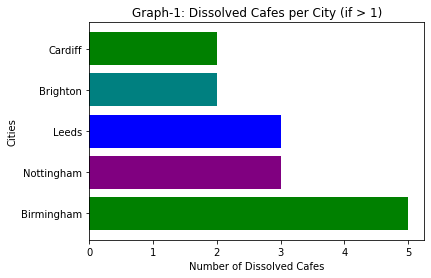

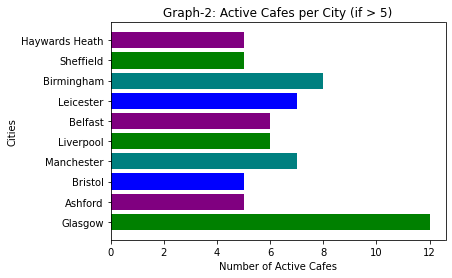

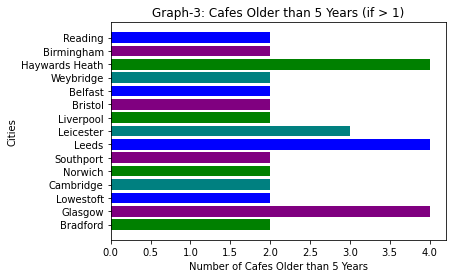

In [34]:
number_dissolved = dissolved_cafes_df['Number of Dissolved Cafes'].tolist()
cities = dissolved_cafes_df['City'].tolist()

New_Colors = ['green','purple', 'blue','teal']

plt.barh(cities,number_dissolved, color=New_Colors)
plt.title('Graph-1: Dissolved Cafes per City (if > 1)')
plt.ylabel('Cities')
plt.xlabel('Number of Dissolved Cafes')
plt.show()

number_active = active_cafes_df['Number of Active Cafes'].tolist()
cities = active_cafes_df['City'].tolist()

plt.barh(cities,number_active, color=New_Colors)
plt.title('Graph-2: Active Cafes per City (if > 5)')
plt.ylabel('Cities')
plt.xlabel('Number of Active Cafes')
plt.show()

number_older = older_cafes_df['Number of Cafes Older than 5 Years'].tolist()
cities = older_cafes_df['City'].tolist()

plt.barh(cities,number_older, color=New_Colors)
plt.title('Graph-3: Cafes Older than 5 Years (if > 1)')
plt.ylabel('Cities')
plt.xlabel('Number of Cafes Older than 5 Years')
plt.show()

### Business Question 2: When is a good time to start a tourism business (as a travel agency) in the UK?
Is it better to start a travel agency during hot or cold season? Does this matter for the sustainability of the company?

Focus group SIC: 79110	Travel agency activities

In [35]:
# Getting tourism related companies
travel_companies = search_for_companies_with_query("Travel", number_of_companies = 300) + search_for_companies_with_query("Travel Agency", number_of_companies = 300)
print(len(travel_companies))
#pp.pprint(travel_companies[3])

600


In [36]:
# Getting detailed info for companies to check SIC codes. SIC code for travel agencies: '79110'.
def get_company_numbers(companies):
    company_numbers = []
    for company in companies:
        company_numbers.append(company['company_number'])
    return company_numbers

In [37]:
travel_company_numbers = get_company_numbers(travel_companies)

In [38]:
details = detailed_info_about_companies_with_ids(travel_company_numbers)

status code is not 'SUCCESS 200'. Will wait 20 seconds
status code is not 'SUCCESS 200'. Will wait 20 seconds
status code is not 'SUCCESS 200'. Will wait 20 seconds
status code is not 'SUCCESS 200'. Will wait 20 seconds
status code is not 'SUCCESS 200'. Will wait 20 seconds
status code is not 'SUCCESS 200'. Will wait 20 seconds
status code is not 'SUCCESS 200'. Will wait 20 seconds
status code is not 'SUCCESS 200'. Will wait 20 seconds
status code is not 'SUCCESS 200'. Will wait 20 seconds
status code is not 'SUCCESS 200'. Will wait 20 seconds
status code is not 'SUCCESS 200'. Will wait 20 seconds
status code is not 'SUCCESS 200'. Will wait 20 seconds


In [39]:
sic_codes = []
for detail in details:
    if 'sic_codes' in detail.keys():
        sic_codes.append(detail['sic_codes'])
    else:
        sic_codes.append(['no_code'])
print(sic_codes[0:5])

company_names = []
for detail in details:
    if 'company_name' in detail.keys():
        company_names.append(detail['company_name'])
    else:
        company_names.append(['no_name'])
print(company_names[0:5])

keys = company_names
values = sic_codes

SIC_dict = {keys[i]: values[i] for i in range(len(keys))}

[['43390', '46440', '46690', '47910'], ['58290'], ['79110'], ['56101'], ['79110']]
['BELNOVA LTD', 'BINAMICS TRAVEL LIMITED', 'CREATIVE TRAVEL CO. LTD', 'EDINBURGH HOSPITALITY GROUP LTD', 'GLOBAL TRAVEL COLLECTION UK, LTD']


In [40]:
# Filtering companies with desired SIC code only
travel_agency_names = []
for key in SIC_dict.keys():
    if '79110' in SIC_dict[key]:
        travel_agency_names.append(key)

travel_agencies = []
for company in travel_companies:
    if company['title'] in travel_agency_names:
        travel_agencies.append(company)
        
pp.pprint(travel_agencies[0])

{'address': {'address_line_1': 'Crichton Drive',
             'country': 'Scotland',
             'locality': 'Grangemouth',
             'postal_code': 'FK3 9DF',
             'premises': '8'},
 'address_snippet': '8 Crichton Drive, Grangemouth, Scotland, FK3 9DF',
 'company_number': 'SC647255',
 'company_status': 'active',
 'company_type': 'ltd',
 'date_of_creation': '2019-11-15',
 'description': 'SC647255 - Incorporated on 15 November 2019',
 'description_identifier': ['incorporated-on'],
 'kind': 'searchresults#company',
 'links': {'self': '/company/SC647255'},
 'matches': {'snippet': [1, 6], 'title': [10, 15]},
 'snippet': 'TRAVEL DREAMS (GRANGEMOUTH) ',
 'title': 'CREATIVE TRAVEL CO. LTD'}


In [41]:
active_agencies = get_active_companies(travel_agencies)
dissolved_agencies = get_dissolved_companies(travel_agencies)

In [42]:
# Getting creation months of companies and the cessation dates for dissolved companies
import datetime
from datetime import datetime

def get_creation_months(agencies):
    creation_months=[]
    for agency in agencies:
        if 'date_of_creation' in agency.keys():
            creation_months.append(datetime.strptime(agency['date_of_creation'], '%Y-%m-%d').month)
    return creation_months
            
creation_months_of_active_agencies = get_creation_months(active_agencies)
creation_months_of_dissolved_agencies = get_creation_months(dissolved_agencies)

def get_cessation_months(dissolved_agencies):
    cessation_months=[]
    for agency in dissolved_agencies:
        if 'date_of_cessation' in agency.keys():
            cessation_months.append(datetime.strptime(agency['date_of_cessation'], '%Y-%m-%d').month)
    return cessation_months

cessation_months_of_dissolved_agencies = get_cessation_months(dissolved_agencies)

In [43]:
# Observing total number of agencies created per month in the dataset with active and dissolved division
counts_travel_agencies = dict.fromkeys(get_creation_months(travel_agencies), 0)
for month in get_creation_months(travel_agencies):
    counts_travel_agencies[month] += 1

counts_active = dict.fromkeys(creation_months_of_active_agencies, 0)
for month in creation_months_of_active_agencies:
    counts_active[month] += 1
    
counts_dissolved = dict.fromkeys(creation_months_of_dissolved_agencies, 0)
for month in creation_months_of_dissolved_agencies:
    counts_dissolved[month] += 1

all_agencies_df = pd.DataFrame.from_dict(counts_travel_agencies, orient='index', columns=['Number of Agencies Created'])    
active_agencies_df = pd.DataFrame.from_dict(counts_active, orient='index', columns=['Still Active'])
dissolved_agencies_df = pd.DataFrame.from_dict(counts_dissolved, orient='index', columns=['Dissolved'])

table_of_months = pd.concat([all_agencies_df, active_agencies_df, dissolved_agencies_df], axis=1)

table_of_months.reset_index(level=0, inplace=True)
table_of_months.rename(columns={"index":"Month"}, inplace=True)
table_of_months.transpose()

,0,1,2,3,4,5,6,7,8,9,10,11
Month,1,2,3,4,5,6,7,8,9,10,11,12
Number of Agencies Created,23,24,18,18,15,13,18,19,20,23,16,16
Still Active,16,18,13,14,12,10,12,13,15,20,12,14
Dissolved,7,6,5,2,3,3,6,6,5,3,4,2


In [44]:
table_of_months['Survival Rate'] = round(table_of_months['Still Active']/table_of_months['Number of Agencies Created']*100,0)
table_of_months.transpose()

,0,1,2,3,4,5,6,7,8,9,10,11
Month,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0
Number of Agencies Created,23.0,24.0,18.0,18.0,15.0,13.0,18.0,19.0,20.0,23.0,16.0,16.0
Still Active,16.0,18.0,13.0,14.0,12.0,10.0,12.0,13.0,15.0,20.0,12.0,14.0
Dissolved,7.0,6.0,5.0,2.0,3.0,3.0,6.0,6.0,5.0,3.0,4.0,2.0
Survival Rate,70.0,75.0,72.0,78.0,80.0,77.0,67.0,68.0,75.0,87.0,75.0,88.0


In [45]:
# Checking the number of dissolved agencies per month
counts_cessation = dict.fromkeys(cessation_months_of_dissolved_agencies, 0)
for month in cessation_months_of_dissolved_agencies:
    counts_cessation[month] += 1

dissolved_cessation_df = pd.DataFrame.from_dict(counts_cessation, orient='index', columns=['Number of Cessation'])

dissolved_cessation_df.reset_index(level=0, inplace=True)
dissolved_cessation_df.rename(columns={"index":"Month"}, inplace=True)

dissolved_cessation_df = dissolved_cessation_df.sort_values('Month', axis =0 , ascending = True)
dissolved_cessation_df.transpose()

,1,10,0,5,6,8,2,4,3,11,9,7
Month,1,2,3,4,5,6,7,8,9,10,11,12
Number of Cessation,6,2,6,2,5,3,8,9,4,2,2,3


### Business Question 2: Mini-report and visualisation:

To gain insight for which season or even precisely which month to prefer to start a travel agency, we firstly check how many companies started at a certain month are still active and how many have been dissolved in our dataset.
Looking at the first graph, unexpectedly for many, agencies started during colder season seems more-likely to stay in business. October definitely stands out as the number of active agencies is the highest where number of dissolved is one of the lowest. December and April also drives attention with very low number of dissolved agencies.

For clearer view of creation month's effect, the survival rate of each is visualised in our second graph. This rate is calculated as a percentage of active agencies over total number of agencies started in that particular month. Where all rates are above 60%, October and December stands out with survival rates above 80% followed by spring season, supporting our first insight.

Additionally, we observe when most of the agency cessations take place. Shown in the third graph, there is hardly a seasonal pattern however, clearly cessations peak around hot season in July and August and are at minimum around year-end. 

We conclude best months to start a travel agency are October and December where July and August seem as the sensitive period in business.

<AxesSubplot:title={'center':'Number of Cessations by Month'}, xlabel='Month', ylabel='Number of Agencies Ceased'>

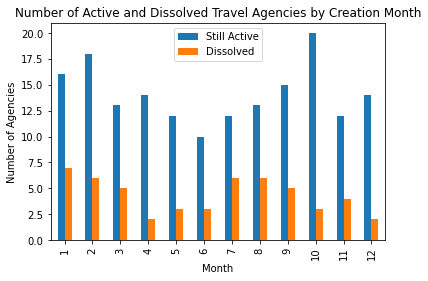

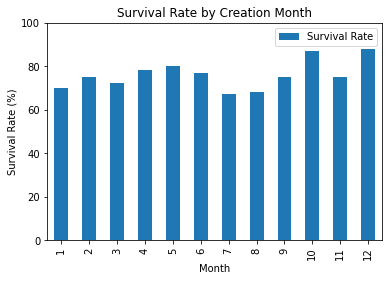

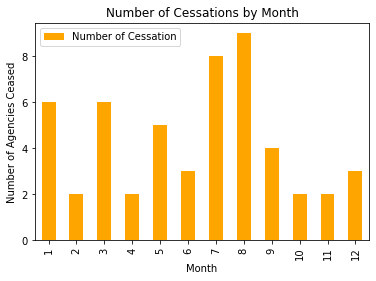

In [47]:
table_of_months.plot(title='Number of Active and Dissolved Travel Agencies by Creation Month', x="Month", y=["Still Active", "Dissolved"], kind = "bar", xlabel = 'Month', ylabel = 'Number of Agencies')

table_of_months.plot(title='Survival Rate by Creation Month', x="Month", y=["Survival Rate"], kind = "bar", xlabel = 'Month', ylabel = 'Survival Rate (%)', ylim=(0,100))

dissolved_cessation_df.plot(title ='Number of Cessations by Month', x="Month", y=["Number of Cessation"], kind = "bar", color = 'orange', xlabel='Month', ylabel = 'Number of Agencies Ceased')

### Business Question 3:  Is the UK becoming more attractive to international entrepreneurs for IT company initiatives?

Do younger IT companies have more diverse boards than relatively older ones?

Focus group SIC: 62020	Information technology consultancy activities

In [17]:
# Getting IT related companies
tech_companies = search_for_companies_with_query("Information", number_of_companies = 200) + search_for_companies_with_query("Technologies", number_of_companies = 200) + search_for_companies_with_query("IT", number_of_companies = 200)
print(len(tech_companies))
#pp.pprint(tech_companies[3])

600


In [18]:
# SIC code check
tech_company_numbers = get_company_numbers(tech_companies)
details = detailed_info_about_companies_with_ids(tech_company_numbers)

sic_codes = []
for detail in details:
    if 'sic_codes' in detail.keys():
        sic_codes.append(detail['sic_codes'])
    else:
        sic_codes.append(['no_code'])
print(sic_codes[0:5])

company_names = []
for detail in details:
    if 'company_name' in detail.keys():
        company_names.append(detail['company_name'])
    else:
        company_names.append(['no_name'])
print(company_names[0:5])

keys = company_names
values = sic_codes

SIC_dict = {keys[i]: values[i] for i in range(len(keys))}

IT_company_names = []
for key in SIC_dict.keys():
    if '62020' in SIC_dict[key]:
        IT_company_names.append(key)

IT_companies = []
for company in tech_companies:
    if company['title'] in IT_company_names:
        IT_companies.append(company)
        
pp.pprint(IT_companies[0])

status code is not 'SUCCESS 200'. Will wait 20 seconds
status code is not 'SUCCESS 200'. Will wait 20 seconds
status code is not 'SUCCESS 200'. Will wait 20 seconds
status code is not 'SUCCESS 200'. Will wait 20 seconds
status code is not 'SUCCESS 200'. Will wait 20 seconds
status code is not 'SUCCESS 200'. Will wait 20 seconds
status code is not 'SUCCESS 200'. Will wait 20 seconds
status code is not 'SUCCESS 200'. Will wait 20 seconds
status code is not 'SUCCESS 200'. Will wait 20 seconds
status code is not 'SUCCESS 200'. Will wait 20 seconds
status code is not 'SUCCESS 200'. Will wait 20 seconds
[['82990'], ['99999'], ['62020', '70229'], ['69109'], ['88100', '88990']]
['INFORMATION LIMITED', 'FUSION CELL CONSULTING LIMITED', 'INFORMATION UN LIMITED', 'INFORMATION ACCESS SOLUTIONS LTD', 'INFORMATION ADVICE AND FITNESS CIC']
{'address': {'address_line_1': 'Gordon Road',
             'address_line_2': 'Ashford',
             'postal_code': 'TW15 3ES',
             'premises': '3'},
 'ad

In [91]:
# Looking at number of active and dissolved companies within IT consultancy group
active_IT = get_active_companies(IT_companies)
dissolved_IT = get_dissolved_companies(IT_companies)
print(len(active_IT))
print(len(dissolved_IT))

161
21


In [20]:
# As number of dissolved companies is significantly low, we keep the analysis for active companies
# Defining a function to get average age of IT companies to make a classification as younger and older than average
from datetime import date

def average_age(active_companies):
    company_ages = []
    for company in active_companies:
        company_age = date.today() - datetime.strptime(company['date_of_creation'], '%Y-%m-%d').date()
        company_ages.append(company_age.days)
    return round((sum(company_ages)/len(company_ages))/365,2)

average_age = average_age(active_IT)
print(average_age)

def get_young_companies(companies):
    young_IT = []
    for company in companies:
        company_age = date.today() - datetime.strptime(company['date_of_creation'], '%Y-%m-%d').date()
        if company_age.days/365 <= average_age:
            young_IT.append(company)
    return young_IT

def get_older_companies(companies):
    older_IT = []
    for company in companies:
        company_age = date.today() - datetime.strptime(company['date_of_creation'], '%Y-%m-%d').date()
        if company_age.days/365 > average_age:
            older_IT.append(company)
    return older_IT

9.08


In [21]:
young_IT = get_young_companies(active_IT)
older_IT = get_older_companies(active_IT)

pp.pprint(young_IT[0])

{'address': {'address_line_1': 'Wivelsfield Green',
             'country': 'United Kingdom',
             'locality': 'Haywards Heath',
             'postal_code': 'RH17 7RH',
             'premises': 'Mirkwood North Common Road'},
 'address_snippet': 'Mirkwood North Common Road, Wivelsfield Green, Haywards '
                    'Heath, United Kingdom, RH17 7RH',
 'company_number': '11065953',
 'company_status': 'active',
 'company_type': 'ltd',
 'date_of_creation': '2017-11-15',
 'description': '11065953 - Incorporated on 15 November 2017',
 'description_identifier': ['incorporated-on'],
 'kind': 'searchresults#company',
 'links': {'self': '/company/11065953'},
 'matches': {'snippet': [], 'title': [1, 11]},
 'snippet': '',
 'title': 'INFORMATION ARCHITECTURE LIMITED'}


In [22]:
# Getting people info for defined younger and older IT company groups
young_IT_numbers = get_company_numbers(young_IT)
older_IT_numbers = get_company_numbers(older_IT)

def get_people_info(company_numbers):
    people_in_filtered_companies = []
    for number in company_numbers:
        people_in_filtered_companies.append(all_persons_in_company(number))
    return people_in_filtered_companies

young_IT_people = get_people_info(young_IT_numbers)
older_IT_people = get_people_info(older_IT_numbers)

In [23]:
# Getting nationalities of people for each group
def get_nationality_of_people(all_people):
    return [ get_nationality_of_person(people)
            for people in all_people
            if people != []]

def get_nationality_of_person(found_people):
    return [ person['nationality']
            for person in found_people
            if 'nationality' in person.keys()]

young_IT_nations = get_nationality_of_people(young_IT_people)
older_IT_nations = get_nationality_of_people(older_IT_people)

def get_edited_list_of_nationalities(found_nationalities):
    merged_list = []
    for nationality in found_nationalities:
        for n in nationality: #eliminating company divison to go for a general overview
            merged_list.append(n)
    return merged_list

young_IT_nationalities = get_edited_list_of_nationalities(young_IT_nations)
older_IT_nationalities = get_edited_list_of_nationalities(older_IT_nations)

In [24]:
# Counting unique nationalities for each group
def get_unique_nationalities(nationalities): 
    unique_nationalities = []
    for nationality in nationalities:
        if nationality not in unique_nationalities:
            unique_nationalities.append(nationality)
    return unique_nationalities

In [68]:
import pandas as pd
counts_young = dict.fromkeys(get_unique_nationalities(young_IT_nationalities), 0)
for nat in young_IT_nationalities:
    counts_young[nat] += 1

counts_older = dict.fromkeys(get_unique_nationalities(older_IT_nationalities), 0)
for nat in older_IT_nationalities:
    counts_older[nat] += 1

# Summarising nationality counts as dataframes
young_nats_df = pd.DataFrame.from_dict(counts_young, orient='index', columns=['In Young IT'])                                                                         
older_nats_df = pd.DataFrame.from_dict(counts_older, orient='index', columns=['In Older IT'])

print(young_nats_df)
print(older_nats_df)

               In Young IT
British                 75
Italian                  3
South African            2
English                  7
Romanian                 3
Colombian                1
Hungarian                3
Indian                  14
Nigerian                 1
Czech                    1
Pakistani                3
Welsh                    1
Turkish                  6
Sri Lankan               1
Lithuanian               1
Portuguese               1
Iranian                  2
Latvian                  2
Irish                    2
Danish                   1
         In Older IT
British           78
Dutch              1
English            3
Indian             4
Irish              1
Latvian            1


In [69]:
# Editing the groups with too few nationalities for a better summarised view in visuals
young_nats_df.reset_index(level=0, inplace=True)
young_nats_df.rename(columns={"index":"Nationality"}, inplace=True)

other = []
for i in list(young_nats_df.index):
    if young_nats_df['In Young IT'][i] < 6:
        other.append(young_nats_df['In Young IT'][i])

other_value = sum(other)
new_row = {'Nationality':'Other'}
young_nats_df = young_nats_df.loc[young_nats_df['In Young IT'] > 6]
young_nats_df = young_nats_df.append(new_row, ignore_index=True)
young_nats_df = young_nats_df.reset_index(drop=True)

for i in list(young_nats_df.index):
    if young_nats_df['Nationality'][i] == 'Other':
        young_nats_df['In Young IT'][i] = other_value

young_nats_df

<ipython-input-69-7e9788e8a11b>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  young_nats_df['In Young IT'][i] = other_value


,Nationality,In Young IT
0,British,75.0
1,English,7.0
2,Indian,14.0
3,Other,28.0


In [70]:
older_nats_df.reset_index(level=0, inplace=True)
older_nats_df.rename(columns={"index":"Nationality"}, inplace=True)

other1 = []
for i in list(older_nats_df.index):
    if older_nats_df['In Older IT'][i] < 2:
        other1.append(older_nats_df['In Older IT'][i])

In [71]:
other_value1 = sum(other1)
new_row1 = {'Nationality':'Other'}
older_nats_df = older_nats_df.loc[older_nats_df['In Older IT'] > 2]
older_nats_df = older_nats_df.append(new_row1, ignore_index=True)
older_nats_df = older_nats_df.reset_index(drop=True)

for i in list(older_nats_df.index):
    if older_nats_df['Nationality'][i] == 'Other':
        older_nats_df['In Older IT'][i] = other_value1
        
older_nats_df

<ipython-input-71-de36418f7329>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  older_nats_df['In Older IT'][i] = other_value1


,Nationality,In Older IT
0,British,78.0
1,English,3.0
2,Indian,4.0
3,Other,3.0


In [76]:
young_nats_df = young_nats_df.set_index('Nationality')
older_nats_df = older_nats_df.set_index('Nationality')

In [77]:
table = pd.concat([young_nats_df, older_nats_df], axis=1)
nanvariables = ['In Young IT', 'In Older IT']

def replace_missing_values(dataset, variable):
    new_data = dataset.copy()
    new_data[variable] = new_data[variable].fillna(0)    
    return new_data

for var in nanvariables:
    table = replace_missing_values(table, var)

table

,In Young IT,In Older IT
Nationality,,
British,75.0,78.0
English,7.0,3.0
Indian,14.0,4.0
Other,28.0,3.0


### Business Question 3: Mini-report and visualisation:

As digitalisation and data science gain more importance everyday, IT consultancy is one of the fastest-paced growing sectors. Do younger companies of this exciting field in the UK are more international initiatives than mature ones?
Our search for insight starts by getting a set of IT consultancies and dividing them into two groups as younger and older companies. This division is done by calculating the average age of full set, which is 9.08 years, companies below this age have been considered as younger and above as older. 

Observing nationality details of people in two groups, following 'British' and 'English', 'Indian' population is the most common non-UK nationality in both groups. For better overview without complexity, all other nationalities are gathered under 'Other' category. It is beneficial to add, this category includes 'Irish' and 'Welsh' where they are negligibly small in numbers.

In below pie charts, we see the division of nationality categories for younger, on the left-hand-side, and older IT consultancies, on the right-hand-side. Younger consultancies are clearly more diverse than the olders having 33.9% of non-UK nationalities where this rate is only 7.9% for older consultancies. Thus, it is clear that recently there has been more international initiatives in IT consultancy within the UK. It will be exciting to see how this will shape the market in near future.

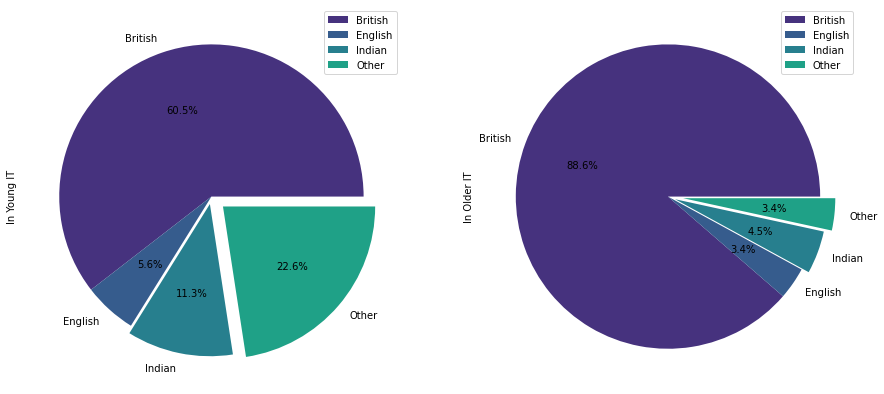

In [89]:
colors = sns.color_palette("viridis", as_cmap=False)
movement = (0, 0, 0.05, 0.1)
plot = table.plot.pie(subplots=True,autopct='%.1f%%',figsize=(15,15), colors=colors, explode=movement)